Decision Tree Model - Classification Algorithm

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('Imported Succesfully')

Imported Succesfully


In [57]:
#Load dataset
data = pd.read_csv("students_data.csv")

Data Exploration

In [58]:
#Data head
data.head()

,Study Hours,Sleep Hours,Social Activity,Exam Score,Pass
0,5.8,5.5,High,75.8,Yes
1,4.8,5.8,Low,64.4,No
2,6.1,7.4,Medium,65.5,Yes
3,7.6,7.2,High,100.1,Yes
4,4.6,6.5,High,54.2,No


In [13]:
#Data basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Study Hours      300 non-null    float64
 1   Sleep Hours      300 non-null    float64
 2   Social Activity  300 non-null    object 
 3   Exam Score       300 non-null    float64
 4   Pass             300 non-null    object 
dtypes: float64(3), object(2)
memory usage: 11.8+ KB


In [54]:
#Data description (numerical value)
data.describe()   

,Study Hours,Sleep Hours,Exam Score
count,300.000000,300.000000,300.000000
mean,4.992333,6.472667,68.274333
std,1.671493,1.154366,20.015809
min,-0.500000,3.500000,6.800000
25%,3.800000,5.675000,55.525000
50%,5.100000,6.500000,67.200000
75%,6.100000,7.200000,79.650000
max,11.500000,10.200000,135.800000


In [19]:
#Data null values
data.isnull().sum()

Study Hours        0
Sleep Hours        0
Social Activity    0
Exam Score         0
Pass               0
dtype: int64

Data Visualization

Text(0.5, 1.0, 'Grade Distribution')

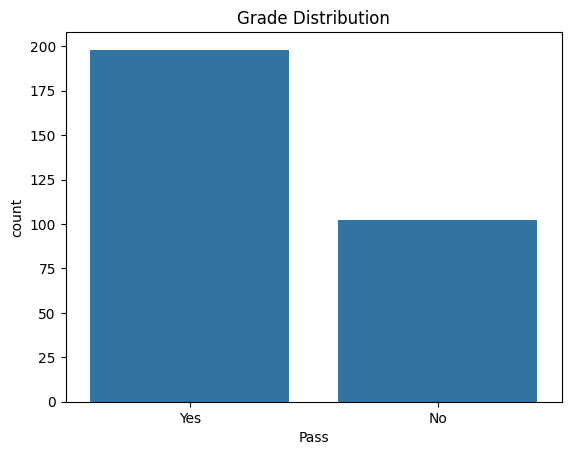

In [11]:
#To visualise 'pass' and 'fail'
sns.countplot(x="Pass", data=data)
plt.title("Grade Distribution")

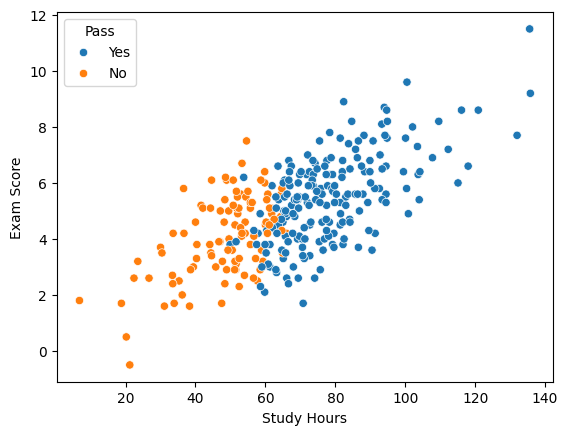

In [23]:
#To find correlation between Study Hours and Exam Score
sns.scatterplot(x='Exam Score', y='Study Hours', data=data, hue='Pass')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

From the above figure, there is a positive correlation between student 'study hours' and 'exam score'

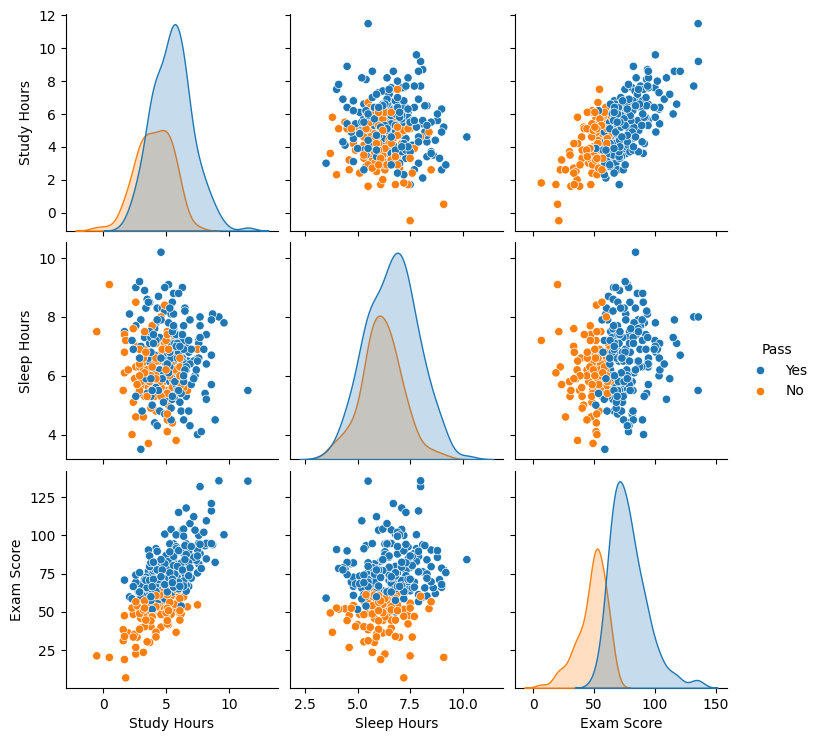

In [12]:
#To make a plot based on multiple variables.....Pair plot
sns.pairplot(data, hue='Pass')
plt.show()

Feature Encoding and Selection

In [56]:
#Encoding categorical variable
data_encode = pd.get_dummies(data, columns= ['Social Activity'], drop_first = True)

In [19]:
data_encode.head()

,Study Hours,Sleep Hours,Exam Score,Pass,Social Activity_Low,Social Activity_Medium
0,5.8,5.5,75.8,Yes,False,False
1,4.8,5.8,64.4,No,True,False
2,6.1,7.4,65.5,Yes,False,True
3,7.6,7.2,100.1,Yes,False,False
4,4.6,6.5,54.2,No,False,False


Defining Variables

In [28]:
# Define input/feature and outcome/target variables
x = data_encode.drop('Pass', axis=1)
y = data_encode['Pass'].map({'Yes':1, 'No':0})

In [40]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify = y)

Creating Model

In [41]:
#To create a model 'Tree'
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
Tree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

Visualising Model ('Tree')

Text(0.5, 1.0, 'Decision Tree')

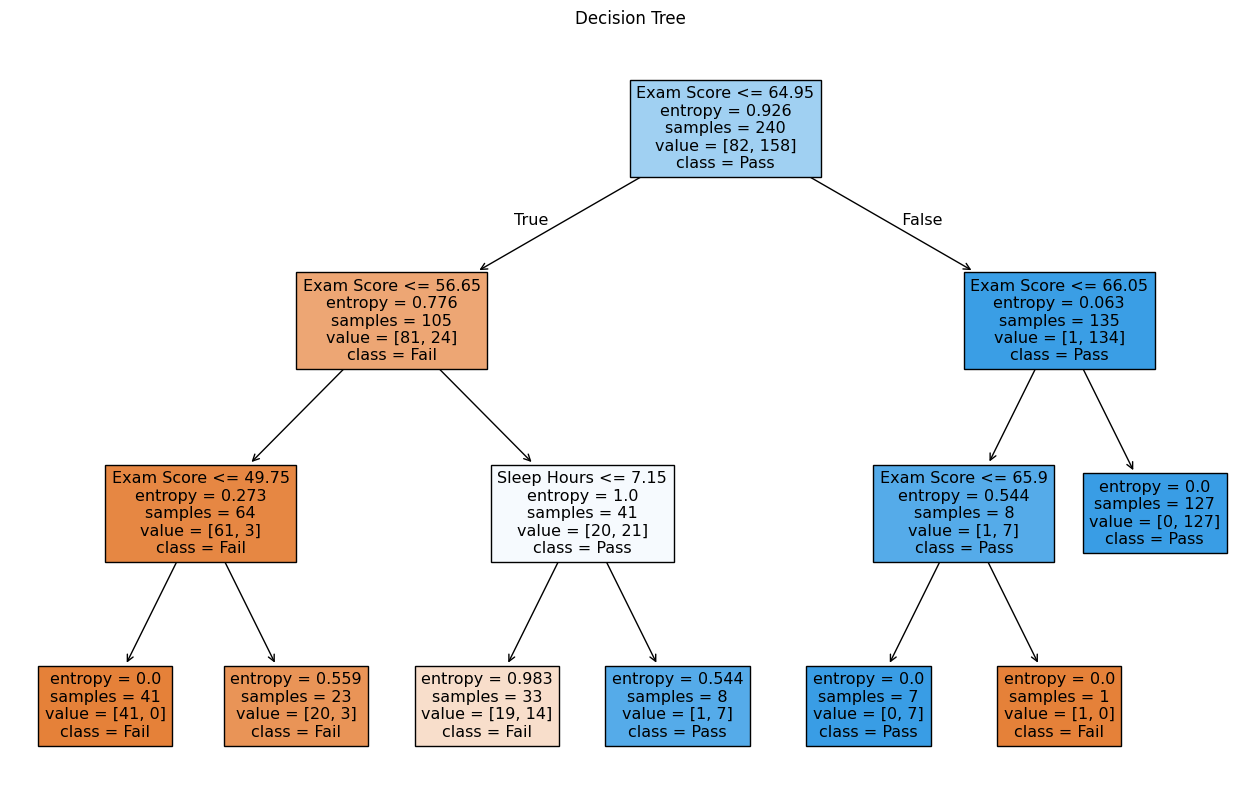

In [43]:
#Importing plot tree from sklearn
from sklearn.tree import plot_tree
plt.figure(figsize=(16,10))
plot_tree(Tree, feature_names=x.columns, class_names=['Fail','Pass'], filled=True)
plt.title('Decision Tree')

Model Accuracy

Accuracy 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.90      0.95        40

    accuracy                           0.93        60
   macro avg       0.92      0.95      0.93        60
weighted avg       0.94      0.93      0.93        60



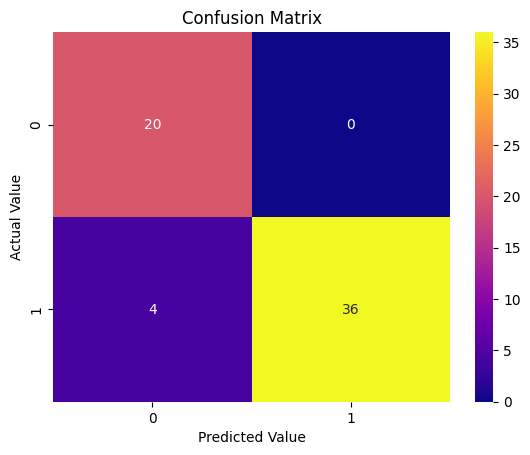

In [64]:
#Import libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Prediction
y_pred= Tree.predict(x_test)

#Accuracy
print('Accuracy', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

#Confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap= 'plasma')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()



      
      


Saving model

In [65]:
import joblib

In [66]:
joblib.dump(Tree, "student_tree_model.joblib")

['student_tree_model.joblib']

Importing Model for Prediction

In [67]:
#create a new variable 'loaded_model'
loaded_model = joblib.load("student_tree_model.joblib")

# prediction with new data
import numpy as np
#create a sample data for prediction
sample_data = pd.DataFrame([[4,3,50,0,1]], columns= x.columns)
Result = loaded_model.predict(sample_data)


In [68]:
print('Prediction:', ['Fail' if R==0 else 'Pass' for R in Result])

Prediction: ['Fail']


In [69]:
x.columns

Index(['Study Hours', 'Sleep Hours', 'Exam Score', 'Social Activity_Low',
       'Social Activity_Medium'],
      dtype='object')